In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


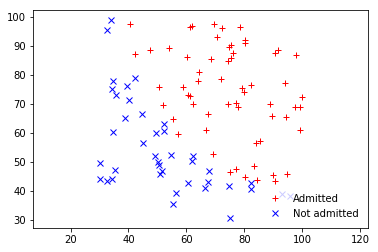

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y
W = np.random.random((1, 3))
print W.shape, temp_X.shape


def h(X, w):
    return np.dot(w, X)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hypothesis(X, w):
    return sigmoid(h(X, w))

def costF(X, Y, w):
    return np.sum(-Y*np.log(hypothesis(X, w)) - (1-Y)*(np.log(1-hypothesis(X, w)))) / n_samples
    
def gradientDescent(X, Y, w, alpha, num_iters):
    for i in xrange(num_iters):
        for j in xrange(w.size):
            w[0,j] -= np.sum(np.multiply(hypothesis(temp_X, W) - temp_Y, temp_X[j,:])) * alpha / n_samples
        if i % 1000 == 0:
            print i, w, costF(X, Y, w)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.005, 2000001)

(1, 3) (3, 100)
0 [[ 0.57682644  0.4604851   0.13194294]] nan
1000 [[ 0.13203162  0.18674046 -0.1172701 ]] 1.75164877385
2000 [[-0.29888649  0.15693863 -0.10179085]] 1.39547091888
3000 [[-0.71586011  0.13025662 -0.12922905]] 1.60004287068
4000 [[-1.12333039  0.156625   -0.06053829]] 1.61755774665
5000 [[-1.51163016  0.11950003 -0.06452267]] 0.973823925118
6000 [[-1.90279174  0.14955257 -0.0999515 ]] 1.1762737277
7000 [[-2.28309924 -0.10874716  0.14294565]] 1.49180029562
8000 [[-2.65601953 -0.02290479  0.17202293]] 2.23606030238
9000 [[-3.01066244  0.19629027 -0.11081724]] 1.34947356082
10000 [[-3.35941994  0.202555   -0.1002797 ]] 1.3716896807
11000 [[-3.69194998 -0.05054407  0.10454922]] 0.940917568226
12000 [[-4.02222087 -0.04030448  0.08280579]] 1.0609670061
13000 [[-4.34629539  0.02201018  0.01643736]] 1.05897495036
14000 [[-4.66164835  0.16677688 -0.03849543]] 1.09468866941
15000 [[-4.97011337  0.04130526  0.16687506]] 2.52069422621
16000 [[-5.26881577  0.12710605 -0.01157904]] 0.

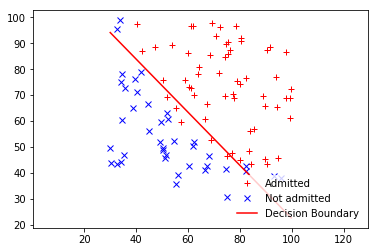

In [5]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./W[0,2])*(W[0,0] + W[0,1]*x)

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')